In [1]:
from sklearn import datasets

In [2]:
# Numerical data에 대해서 살펴보자.
iris = datasets.load_iris()

In [3]:
# 먼저 사용할 데이터에 대해서 살펴보자.
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Gaussian Naive Bayes는 likelihood를 Gaussian을 이용하여 나타낸다. 즉,
$$P(x_i|y)=\frac{1}{\sqrt{2\pi\sigma_{y}^{2}}}exp{(-\frac{(x_i-\mu_y)^2}{2\sigma_{y}^{2}})}$$

## 1. EDA

각 feature의 분포를 시각화해보자.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 5)

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from collections import Counter

In [9]:
# 각 그룹의 수를 확인합니다.
Counter(iris.target)

Counter({0: 50, 1: 50, 2: 50})

> Group 0

In [10]:
group_0 = iris.data[:50]

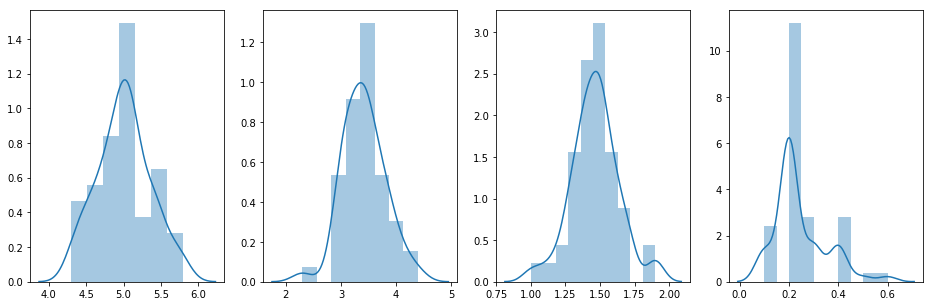

In [24]:
# 첫 번째 feature
plt.subplot(1,4,1)
sns.distplot(group_0[:, 0])

# 두 번째 feature
plt.subplot(1,4,2)
sns.distplot(group_0[:, 1])

# 세 번째 feature
plt.subplot(1,4,3)
sns.distplot(group_0[:, 2])

# 네 번째 feature
plt.subplot(1,4,4)
sns.distplot(group_0[:, 3])

> Group 1

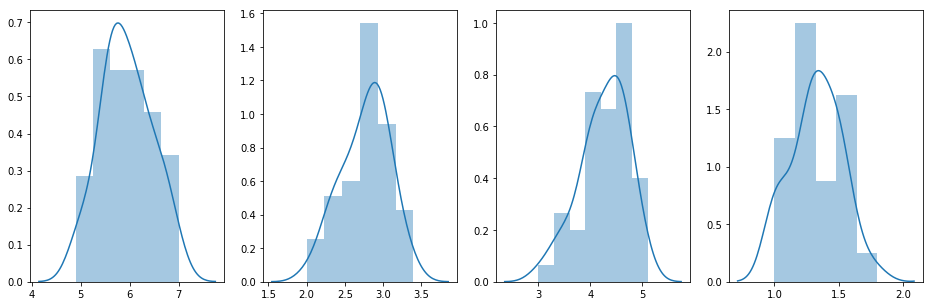

In [25]:
# Group 1
group_1 = iris.data[50:100]

# 첫 번째 feature
plt.subplot(1,4,1)
sns.distplot(group_1[:, 0])

# 두 번째 feature
plt.subplot(1,4,2)
sns.distplot(group_1[:, 1])

# 세 번째 feature
plt.subplot(1,4,3)
sns.distplot(group_1[:, 2])

# 네 번째 feature
plt.subplot(1,4,4)
sns.distplot(group_1[:, 3])

> Group 2

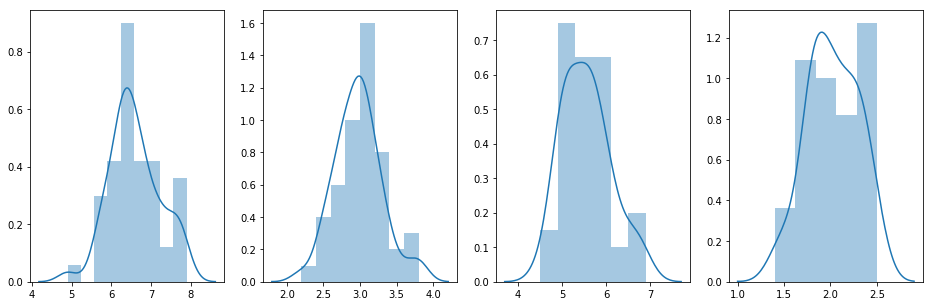

In [26]:
group_2 = iris.data[100:]

# 첫 번째 feature
plt.subplot(1,4,1)
sns.distplot(group_2[:, 0])

# 두 번째 feature
plt.subplot(1,4,2)
sns.distplot(group_2[:, 1])

# 세 번째 feature
plt.subplot(1,4,3)
sns.distplot(group_2[:, 2])

# 네 번째 feature
plt.subplot(1,4,4)
sns.distplot(group_2[:, 3])

중심극한정리에 의하면 결국, 정규분포에 근사하게 된다.

## 2. 데이터를 학습 데이터와 테스트 데이터로 구분합니다.

In [14]:
# 검증 데이터를 사용하지 않습니다. (사용할 필요성이 없습니다.)
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [15]:
print('Train x', train_x[:1])
print('Train y', train_y[:1])

Train x [[5.5 2.4 3.7 1. ]]
Train y [1]


In [16]:
# 카테고리의 비율이 적절하게, 그리고 원본 데이터와 비교하여 비율이 비슷하게 나누어졌는지 확인해봅니다.
from collections import Counter

In [17]:
print('원본 데이터의 비율 :', Counter(iris.target))
print('학습 데이터의 비율 :', Counter(train_y))
print('테스트 데이터의 비율 :', Counter(test_y))

원본 데이터의 비율 : Counter({0: 50, 1: 50, 2: 50})
학습 데이터의 비율 : Counter({1: 37, 2: 37, 0: 31})
테스트 데이터의 비율 : Counter({0: 19, 1: 13, 2: 13})


## 3. 모델을 학습합니다.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
# 학습 셋으로만 scaling을 실시합니다.
scaler = scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)
# 학습 셋에 이용했던 scaler를 테스트 셋에 이용합니다.
scaled_test_x = scaler.transform(test_x)

GaussianNB에서 scaling을 하지 않고 모델을 학습하고, 테스트해도 같은 결과가 나옵니다. 왜 그럴까요? Likelihood를 다른 것을 사용하게 하면(가우시안말고) scaling이 필요할 수 있습니다. 하지만 모델을 학습할 때는 GNB말고 다양한 모델을 학습시키기 때문에, 데이터를 scaling 하여 다른 학습모델에서도 테스트할 수 있도록 미리 scaling 작업을 해 주면 좋습니다.

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [21]:
gnb_model = gnb.fit(scaled_train_x, train_y)

## 4. 모델을 테스트합니다.

In [22]:
pred = gnb_model.predict(scaled_test_x)
print("Accuracy :", (pred == test_y).sum() / len(test_x))

Accuracy : 0.9777777777777777
